In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# ===========================================
# 🧹 TASK 1: DATA UNDERSTANDING & CLEANING
# Dataset: 1730285881-Airbnb_Open_Data.xlsx
# ===========================================

import pandas as pd
import numpy as np
from google.colab import files

# ✅ Step 1: Upload file
uploaded = files.upload()  # 📂 Upload again if needed

# ✅ Step 2: Load the Excel file
df = pd.read_excel('1730285881-Airbnb_Open_Data (1).xlsx')  # 👈 use the renamed file

# ✅ Step 3: Quick overview
print("🔹 First 5 rows:")
display(df.head())

print("\n🔹 Data Info:")
df.info()

print("\n🔹 Missing Values Count:")
print(df.isnull().sum())

# ✅ Step 4: Clean price and service fee columns
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

# ✅ Step 5: Drop irrelevant or duplicate columns
drop_cols = ['id', 'NAME', 'name', 'host name', 'country', 'country cc']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# ✅ Step 6: Handle missing values
df = df.fillna(df.median(numeric_only=True))

# ✅ Step 7: Summary statistics
print("\n🔹 Summary Statistics:")
display(df.describe())

# ✅ Step 8: Verify cleaning
print("\n✅ Final Missing Values (After Cleaning):")
print(df.isnull().sum())

print("\n✅ DataFrame shape:", df.shape)


Saving 1730285881-Airbnb_Open_Data (1).xlsx to 1730285881-Airbnb_Open_Data (1) (1).xlsx
🔹 First 5 rows:


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN



🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non

,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,86706,102599.000000,102599.000000,102599.000000,102599.000000
mean,4.925411e+10,40.728093,-73.949644,0.497276,2012.486447,625.290422,125.026852,8.115371,27.447207,2019-06-12 03:40:52.065601024,1.275896,3.278219,7.915038,140.936179
min,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,0.000000,2008.000000,341.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.280000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,912.000000,182.000000,5.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,268.000000
max,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,2.853900e+10,0.055854,0.049519,0.499995,5.759583,331.272137,66.237438,30.494537,49.472332,NaN,1.622073,1.282711,32.170972,135.171770



✅ Final Missing Values (After Cleaning):
host id                                0
host_identity_verified               289
neighbourhood group                   29
neighbourhood                         16
lat                                    0
long                                   0
country code                         131
instant_bookable                       0
cancellation_policy                   76
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                      0
last review                        15893
reviews per month                      0
review rate number                     0
calculated host listings count         0
availability 365                       0
house_rules                        54843
license                           102597
dtype: int64

✅ DataFrame shape: (102599, 22)


🔹 Shape of dataset: (102599, 22)

🔹 Columns:
['host id', 'host_identity_verified', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

🔹 Summary Statistics (Numerical Columns):


,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,86706,102599.000000,102599.000000,102599.000000,102599.000000
mean,4.925411e+10,40.728093,-73.949644,0.497276,2012.486447,625.290422,125.026852,8.115371,27.447207,2019-06-12 03:40:52.065601024,1.275896,3.278219,7.915038,140.936179
min,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,0.000000,2008.000000,341.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.280000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,912.000000,182.000000,5.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,268.000000
max,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,2.853900e+10,0.055854,0.049519,0.499995,5.759583,331.272137,66.237438,30.494537,49.472332,NaN,1.622073,1.282711,32.170972,135.171770



💰 Price Insights:
Average price: 625.29
Median price: 624.00
Standard Deviation: 331.27

📍 Top 10 Neighbourhoods by Average Price:


,price
neighbourhood,
New Dorp,1045.000000
"Chelsea, Staten Island",1042.000000
Fort Wadsworth,1024.000000
Little Neck,817.750000
Jamaica Hills,812.904762
Arden Heights,804.888889
Midland Beach,796.176471
Shore Acres,792.260870
Mill Basin,775.142857



🛏️ Room Type Distribution:


,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116



👤 Top 10 Hosts with Most Listings:


,count
host id,
862834181,2
70834921655,2
65519636966,2
635525656,2
32812127929,2
11710356637,2
90549798737,2
26969548045,2
32202051101,2


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


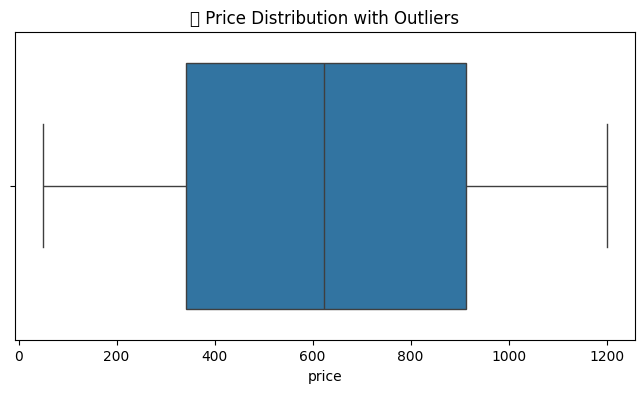

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


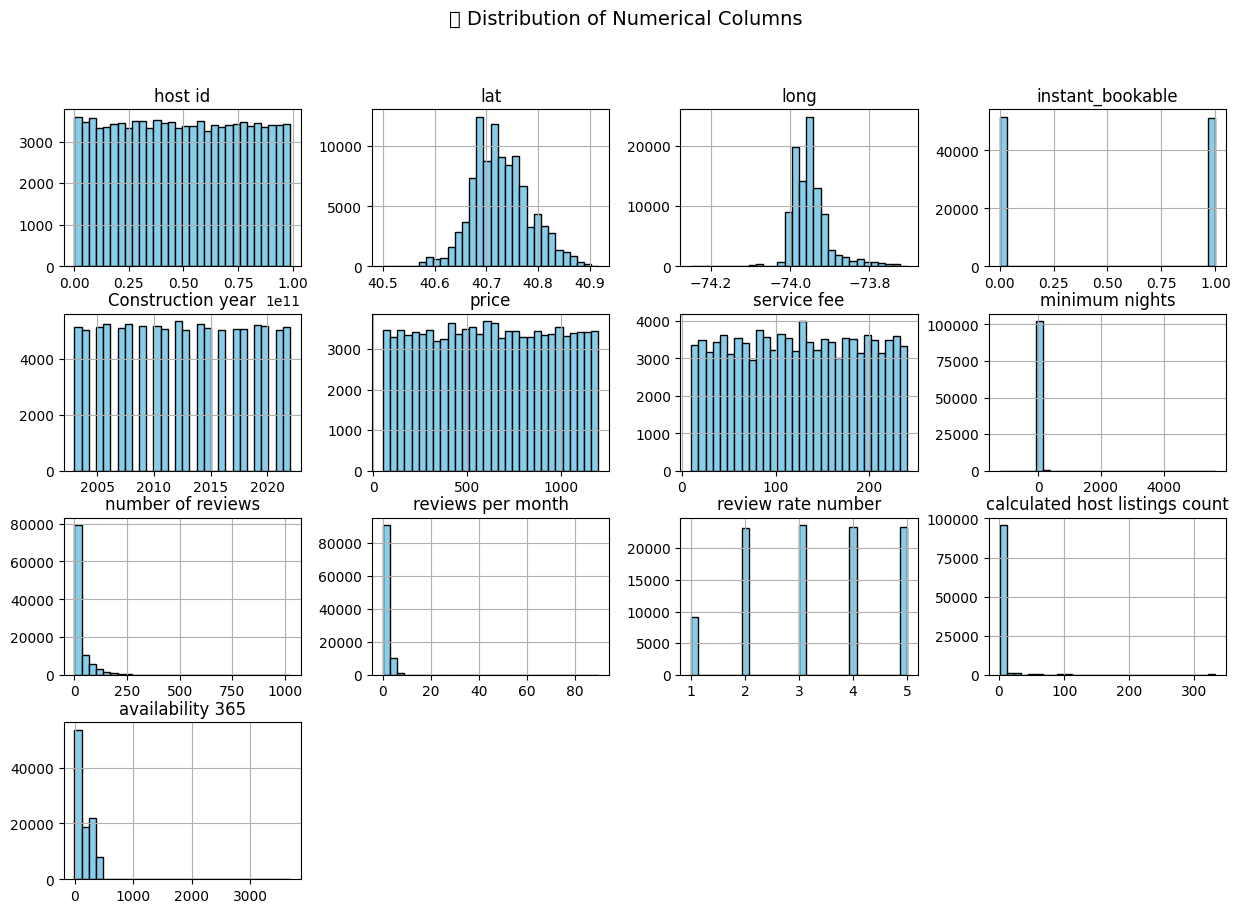

In [3]:
# ===========================================
# 📊 TASK 2: DESCRIPTIVE STATISTICS & INSIGHTS
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Dataset overview
print("🔹 Shape of dataset:", df.shape)
print("\n🔹 Columns:")
print(df.columns.tolist())

# ✅ Step 2: Statistical summary
print("\n🔹 Summary Statistics (Numerical Columns):")
display(df.describe())

# ✅ Step 3: Average, median, and standard deviation of price
if 'price' in df.columns:
    print("\n💰 Price Insights:")
    print(f"Average price: {df['price'].mean():.2f}")
    print(f"Median price: {df['price'].median():.2f}")
    print(f"Standard Deviation: {df['price'].std():.2f}")

# ✅ Step 4: Top 10 neighborhoods by average price
if 'neighbourhood' in df.columns:
    top_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
    print("\n📍 Top 10 Neighbourhoods by Average Price:")
    display(top_neigh)

# ✅ Step 5: Most common room types
if 'room type' in df.columns:
    print("\n🛏️ Room Type Distribution:")
    display(df['room type'].value_counts())

# ✅ Step 6: Top 10 hosts with most listings
if 'host id' in df.columns:
    top_hosts = df['host id'].value_counts().head(10)
    print("\n👤 Top 10 Hosts with Most Listings:")
    display(top_hosts)

# ✅ Step 7: Outlier Detection (Optional)
if 'price' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['price'])
    plt.title("💰 Price Distribution with Outliers")
    plt.show()

# ✅ Step 8: Distribution of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

df[num_cols].hist(figsize=(15,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("📈 Distribution of Numerical Columns", fontsize=14)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


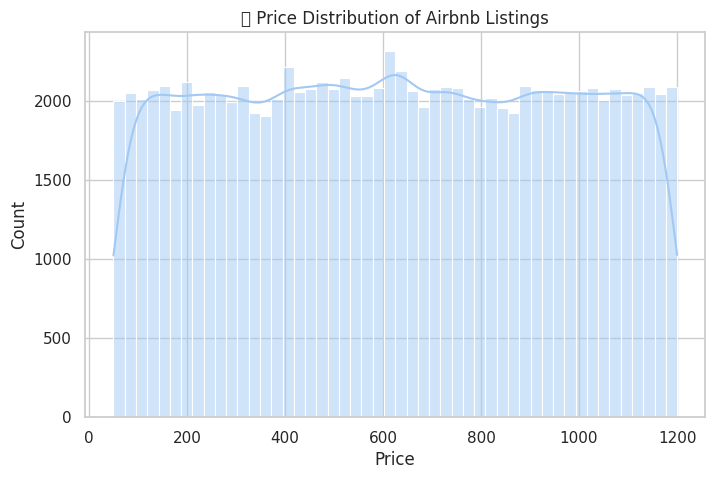

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


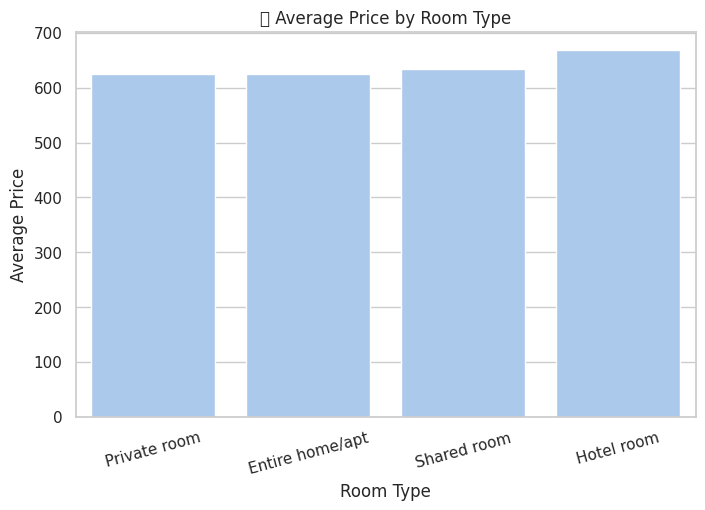

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


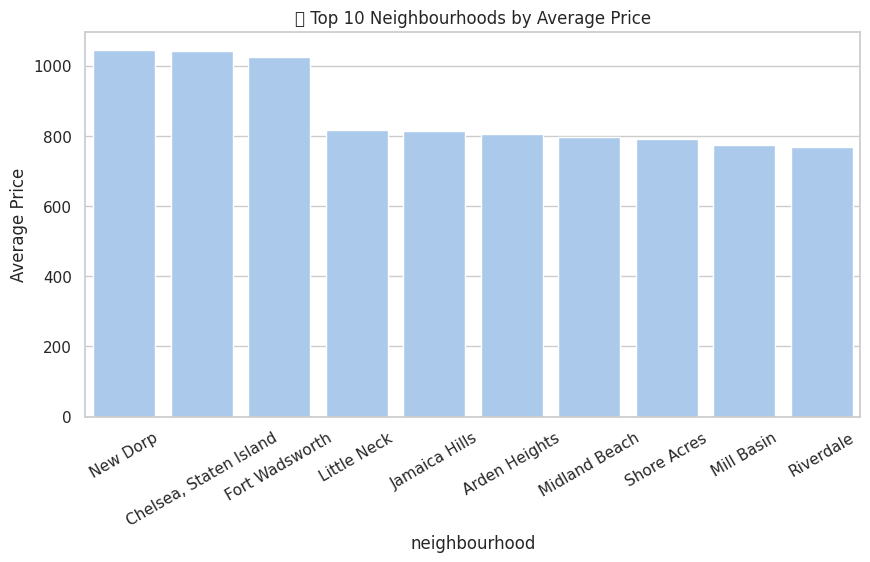

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


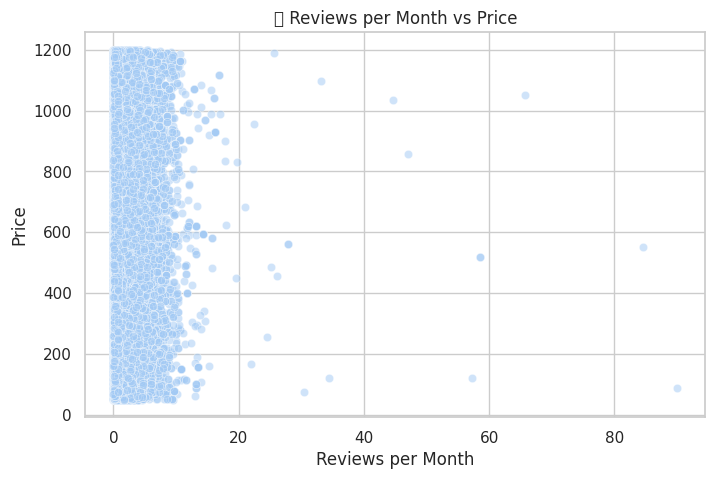

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


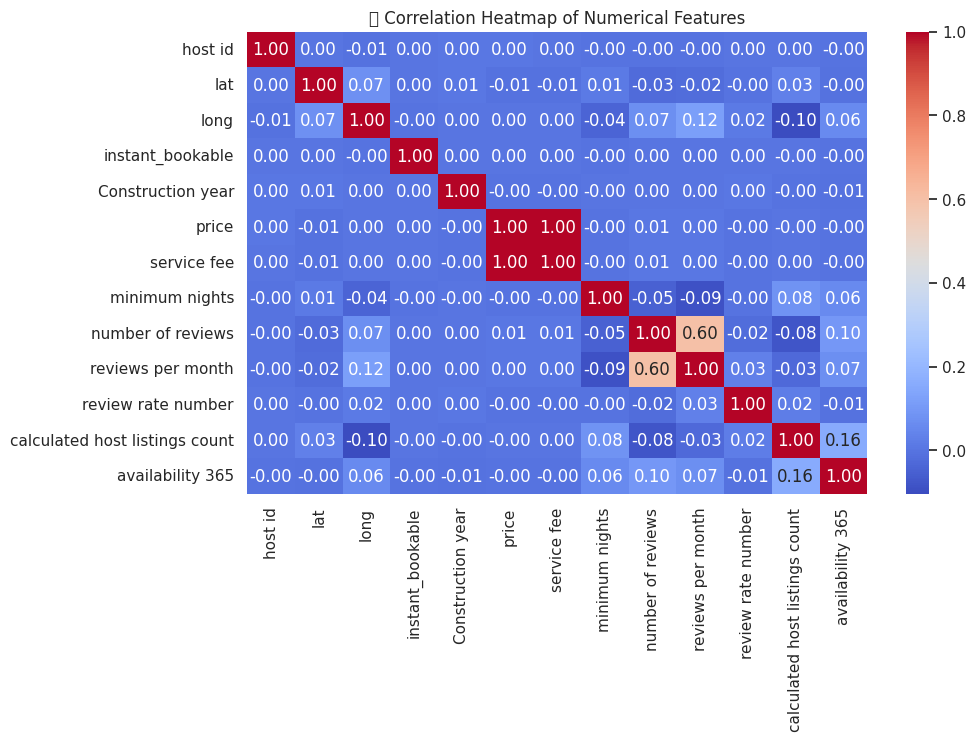

In [4]:
# ===========================================
# 🎨 TASK 3: EXPLORATORY DATA VISUALIZATION
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Optional: set visual style
sns.set(style="whitegrid", palette="pastel")

# ============================
# 1️⃣ Price Distribution
# ============================
if 'price' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title("💰 Price Distribution of Airbnb Listings")
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

# ============================
# 2️⃣ Average Price by Room Type
# ============================
if 'room type' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='room type', y='price', data=df, estimator='mean', errorbar=None)
    plt.title("🏠 Average Price by Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Average Price")
    plt.xticks(rotation=15)
    plt.show()

# ============================
# 3️⃣ Average Price by Neighbourhood
# ============================
if 'neighbourhood' in df.columns:
    top10_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top10_neigh.index, y=top10_neigh.values)
    plt.title("📍 Top 10 Neighbourhoods by Average Price")
    plt.ylabel("Average Price")
    plt.xticks(rotation=30)
    plt.show()

# ============================
# 4️⃣ Reviews per Month vs Price
# ============================
if 'reviews per month' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='reviews per month', y='price', data=df, alpha=0.5)
    plt.title("💬 Reviews per Month vs Price")
    plt.xlabel("Reviews per Month")
    plt.ylabel("Price")
    plt.show()

# ============================
# 5️⃣ Correlation Heatmap
# ============================
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Correlation Heatmap of Numerical Features")
plt.show()


In [8]:
# ===============================================
# 🌍 TASK 4: GEOGRAPHICAL VISUALIZATION WITH FOLIUM
# ===============================================

import folium

# ✅ Step 1: Check if latitude & longitude columns exist
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Create a base map centered around the average location
    m = folium.Map(
        location=[df['latitude'].mean(), df['longitude'].mean()],
        zoom_start=11,
        tiles='cartodb positron'
    )

    # ✅ Step 2: Add points for listings
    for _, row in df.head(500).iterrows():  # limit to 500 points for performance
        popup_info = f"""
        <b>Name:</b> {row.get('name', 'N/A')}<br>
        <b>Neighbourhood:</b> {row.get('neighbourhood', 'N/A')}<br>
        <b>Price:</b> ${row.get('price', 'N/A')}<br>
        <b>Room Type:</b> {row.get('room type', 'N/A')}
        """
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=4,
            color='blue',
            fill=True,
            fill_opacity=0.5,
            popup=popup_info
        ).add_to(m)

    # ✅ Step 3: Display the interactive map
    m
else:
    print("❌ Latitude or Longitude column not found in dataset.")


❌ Latitude or Longitude column not found in dataset.


In [9]:
# ============================================
# 📊 TASK 5: STATISTICAL AND BUSINESS INSIGHTS
# ============================================

import pandas as pd
import numpy as np

# Make column names easy to use
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ 1️⃣ Most Expensive Neighbourhoods
if 'neighbourhood' in df.columns and 'price' in df.columns:
    expensive_neigh = (
        df.groupby('neighbourhood')['price']
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )
    print("🏙️ Top 10 Most Expensive Neighbourhoods:")
    print(expensive_neigh)
    print("\n")

# ✅ 2️⃣ Cheapest Neighbourhoods
if 'neighbourhood' in df.columns and 'price' in df.columns:
    cheap_neigh = (
        df.groupby('neighbourhood')['price']
        .mean()
        .sort_values(ascending=True)
        .head(10)
    )
    print("💸 Top 10 Cheapest Neighbourhoods:")
    print(cheap_neigh)
    print("\n")

# ✅ 3️⃣ Average Price per Room Type
if 'room_type' in df.columns and 'price' in df.columns:
    avg_room_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
    print("🏠 Average Price per Room Type:")
    print(avg_room_price)
    print("\n")

# ✅ 4️⃣ Correlation of Price with Other Features
corr = df.corr(numeric_only=True)
if 'price' in corr.columns:
    price_corr = corr['price'].sort_values(ascending=False)
    print("🔗 Correlation of Price with Other Numerical Features:")
    print(price_corr)
    print("\n")

# ✅ 5️⃣ Top Hosts with Most Listings
if 'host_id' in df.columns:
    top_hosts = df['host_id'].value_counts().head(10)
    print("👤 Top 10 Hosts with Most Listings:")
    print(top_hosts)
    print("\n")

# ✅ 6️⃣ Availability Analysis
if 'availability_365' in df.columns:
    avg_availability = df['availability_365'].mean()
    print(f"📅 Average availability (days/year): {avg_availability:.2f}\n")


🏙️ Top 10 Most Expensive Neighbourhoods:
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


💸 Top 10 Cheapest Neighbourhoods:
neighbourhood
Lighthouse Hill               107.666667
Spuyten Duyvil                293.444444
Rossville                     300.666667
Breezy Point                  309.888889
Richmondtown                  373.400000
Castleton Corners             417.230769
Bay Terrace, Staten Island    429.500000
Emerson Hill                  443.800000
West Farms                    463.166667
Randall Manor                 472.400000
Name: price, dtype: float64


🏠 Average Price per Room Type:
room_type
Hotel 